Excercise 5
Neural Networks in Keras
Use keras framework to solve the below exercises.

In [1]:
!pip install spacy-transformers
!pip install wget
!pip install livelossplot --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.8/190.8 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 94.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 69.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 27.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 85.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 64.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=7f2e01085c4e45ab2320cae710d63475d99997f5c3213c25f7f38a51e5b43fd2
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [2]:
import pandas as pd
import os
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import r2_score, roc_auc_score,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.svm import SVC
import spacy
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
import re
import spacy_transformers
import multiprocessing
from sklearn.pipeline import Pipeline
import xgboost as xgb
from collections import Counter

from tensorflow.keras.preprocessing.sequence import pad_sequences

from sklearn.datasets import make_blobs
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
import multiprocessing

from sklearn.model_selection import train_test_split

from keras import backend as K
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense, Dropout
from keras.layers import Embedding
from livelossplot import PlotLossesKeras


import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer


nltk.download('punkt')
nltk.download('wordnet')
#####
nltk.download('stopwords')
stopwords_en = stopwords.words('english')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
dataTraining = pd.read_csv('https://github.com/sergiomora03/AdvancedTopicsAnalytics/raw/main/datasets/dataTraining.zip', encoding='UTF-8', index_col=0)

In [4]:
X = dataTraining['plot']
y = (dataTraining['rating'] >= dataTraining['rating'].mean()).astype(int)

Data Precosessing
Remove stopwords
Lowercase
split the text in words
pad_sequences

In [5]:
#Añadir stopwords adicionales que se consideren necesarios
stopwords_adicionales = ["is", "the","huw","a","b","c","d","e","f","g","h","i","j","k","l","m","n","o","p","q","r","s","t","u","v","w","x","y","z"]
stopwords_en.extend(stopwords_adicionales)

#Creacion de una función para poder realizar un preprocesamiento del plot.
def preprocesamiento(text):
  #Convertir todo a lowercase
  text = text.str.lower()
  # Eliminar stopwords
  text = text.apply(lambda x: ' '.join([word for word in x.split() if word not in stopwords_en]))
  # Quitar caracteres que no sean letras (Se eliminan caracteres especiales y numeros)
  text = text.apply(lambda x: ' '.join([re.sub(r'[^a-zA-Z]', '', word) for word in x.split()]))
  #Quitarle espacios en blanco
  text = text.apply(lambda x: ' '.join(x.split()))
  # Dividir el texto en palabras usando split()
  #text = text.apply(lambda x: x.split())

  return text

  X = preprocesamiento(X)

Vocubulary

In [6]:
# For vocabulary only the intersec characters is used to avoid issues with data collection
voc = set(''.join(X))
vocabulary = {x: idx + 1 for idx, x in enumerate(set(voc))}

Embeding

In [7]:
# Max len
max_len = 820
X = [x[:max_len] for x in X]
# Convert characters to int and pad
X = [[vocabulary[x1] for x1 in x if x1 in vocabulary.keys()] for x in X]

X_pad = pad_sequences(X, maxlen=max_len)

Build Model - Create the network

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.33, random_state=42)

In [9]:
model = Sequential()
model.add(Embedding(len(vocabulary) + 1, 128, input_length=max_len))
model.add(LSTM(32))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 820, 128)          9600      
                                                                 
 lstm (LSTM)                 (None, 32)                20608     
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 30241 (118.13 KB)
Trainable params: 30241 (118.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


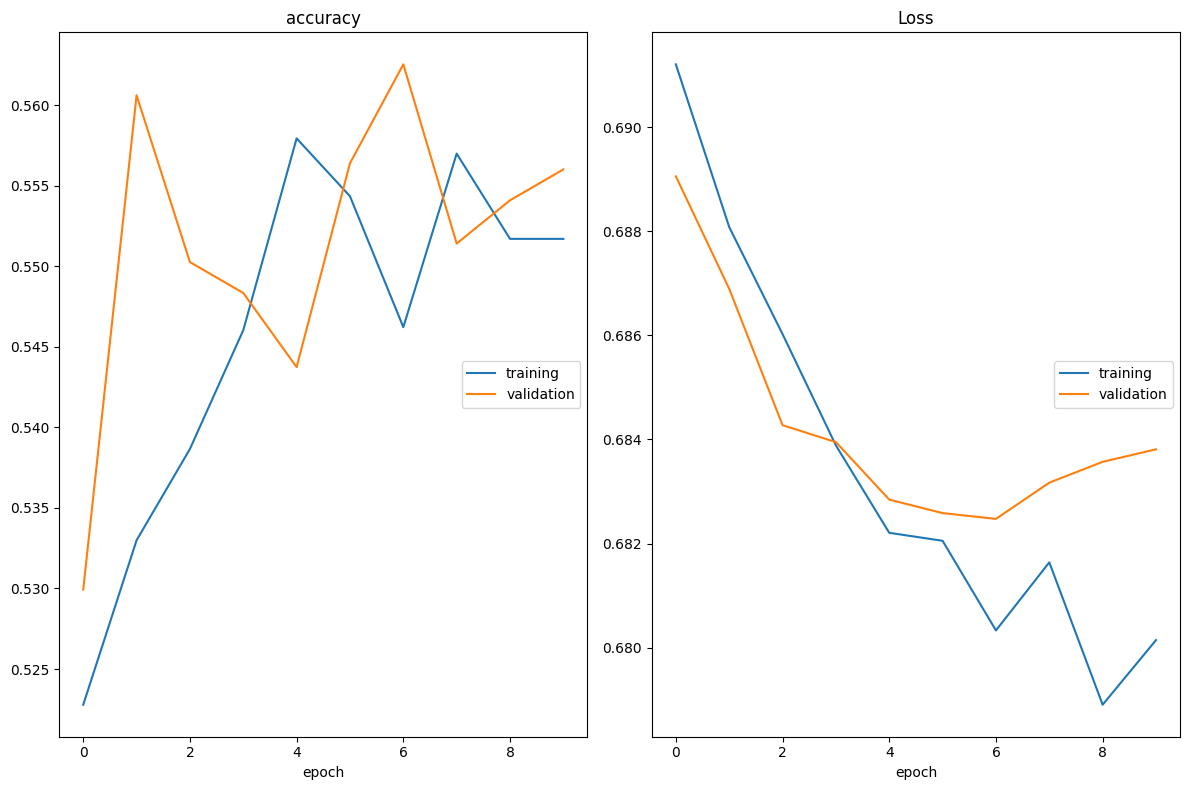

accuracy
	training         	 (min:    0.523, max:    0.558, cur:    0.552)
	validation       	 (min:    0.530, max:    0.563, cur:    0.556)
Loss
	training         	 (min:    0.679, max:    0.691, cur:    0.680)
	validation       	 (min:    0.682, max:    0.689, cur:    0.684)
42/42 [==============================] - 60s 1s/step - loss: 0.6801 - accuracy: 0.5517 - val_loss: 0.6838 - val_accuracy: 0.5560


In [10]:
model.fit(X_train, y_train, validation_data=[X_test, y_test],
          batch_size=128, epochs=10, verbose=1,
          callbacks=[PlotLossesKeras()])

In [11]:
y_pred = (model.predict(X_test) > 0.5)[:,0].astype("int32")
print((y_pred == y_test).mean())

82/82 [==============================] - 9s 102ms/step
0.5560245587106677


5.2 Decision Boundary -- Moons Dataset

Exercise: Use keras framework to find a decision boundary for point in the make_moons.

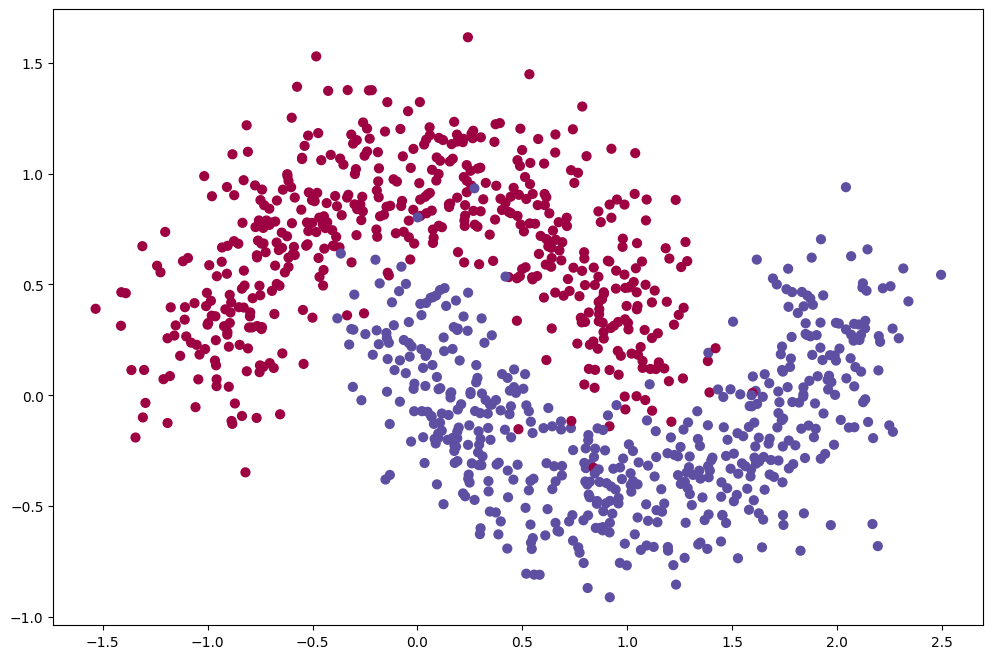

In [12]:
# Create moons dataset.

from sklearn.datasets import make_moons

x_train, y_train = make_moons(n_samples=1000, noise= 0.2, random_state=3)
plt.figure(figsize=(12, 8))
plt.scatter(x_train[:, 0], x_train[:,1], c=y_train, s=40, cmap=plt.cm.Spectral);

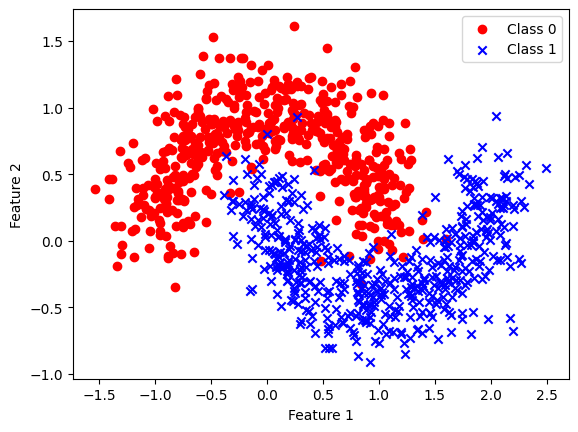

In [18]:
# Función para trazar los datos con colores diferentes según las etiquetas de clase

def plot_data(X, y):
    """
    Plots the data points with different colors based on their class labels.
    Parameters:
        X (numpy.ndarray): The feature vectors of the data.
        y (numpy.ndarray): The corresponding class labels (0 or 1).
    """
    # Trama puntos de clase 0 (suponiendo que la clase 0 está representada por 0)
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label='Class 0', c='red', marker='o')
    # Trama puntos de clase 1 (suponiendo que la clase 1 está representada por 1)
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label='Class 1', c='blue', marker='x')
    # Establece etiquetas y leyenda
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend(loc='best')

    # Muestra el gráfico
    plt.show()


1/1 [==============================] - 0s 24ms/step


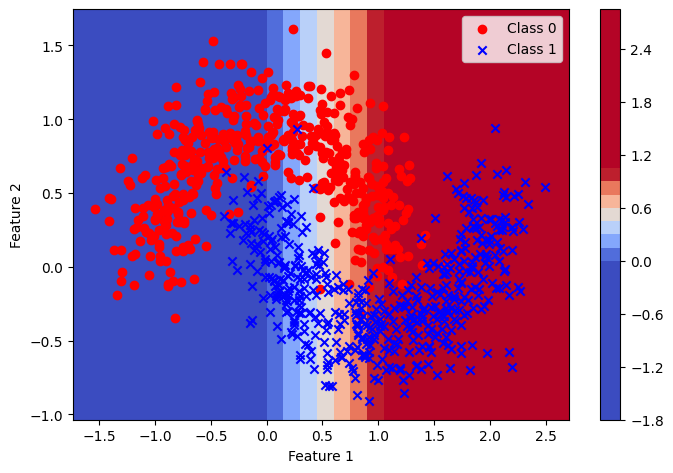

In [19]:
# Creación de un modelo de red neuronal secuencial vacío
model = Sequential()

# Función para trazar la región de decisión del modelo
def plot_decision_region(model, X, pred_fun):
    # Calcula los valores mínimos y máximos en las dimensiones X e Y del conjunto de datos
    min_x = np.min(X[:, 0])
    max_x = np.max(X[:, 0])
    min_y = np.min(X[:, 1])
    max_y = np.max(X[:, 1])

    # Ajusta los límites del gráfico para incluir un pequeño espacio adicional alrededor de los valores extremos
    min_x = min_x - (max_x - min_x) * 0.05
    max_x = max_x + (max_x - min_x) * 0.05
    min_y = min_y - (max_y - min_y) * 0.05
    max_y = max_y + (max_y - min_y) * 0.05

    # Crea una serie de valores equidistantes en el rango ajustado de X e Y
    x_vals = np.linspace(min_x, max_x, 30)
    y_vals = np.linspace(min_y, max_y, 30)

    # Crea una cuadrícula de puntos basada en los valores X e Y
    XX, YY = np.meshgrid(x_vals, y_vals)
    grid_r, grid_c = XX.shape
    # Inicializa una matriz de ceros para almacenar las predicciones del modelo en cada punto de la cuadrícula
    ZZ = np.zeros((grid_r, grid_c))
    # Calcula las predicciones del modelo para cada punto en la cuadrícula
    for i in range(grid_r):
        for j in range(grid_c):
            ZZ[i, j] = pred_fun(model, XX[i, j], YY[i, j])

    # Traza las regiones de decisión en el gráfico utilizando un mapa de colores
    plt.contourf(XX, YY, ZZ, 30, cmap=plt.cm.coolwarm, vmin=0, vmax=1)
    plt.colorbar()
    plt.xlabel("x")
    plt.ylabel("y")

# Función para predecir la clase en función de las coordenadas (x1, x2)
def pred_fun(model, x1, x2):
    # Crea un vector de características con las coordenadas (x1, x2)
    xval = np.array([[x1, x2]])
    # Realiza una predicción utilizando el modelo y devuelve el resultado
    return model.predict(xval)[0, 0]

# Crea una figura para el gráfico
plt.figure(figsize=(8, 16/3))
# Llama a la función plot_decision_region para visualizar la región de decisión del modelo
plot_decision_region(model, x_train, pred_fun)
# Llama a la función plot_data para visualizar los datos de entrenamiento
plot_data(x_train, y_train)

In [ ]:
# Creación de un modelo de red neuronal secuencial vacío
model = Sequential()

# Función para trazar la región de decisión del modelo
def plot_decision_region(model, X, pred_fun):
    # Calcula los valores mínimos y máximos en las dimensiones X e Y del conjunto de datos
    min_x = np.min(X[:, 0])
    max_x = np.max(X[:, 0])
    min_y = np.min(X[:, 1])
    max_y = np.max(X[:, 1])

    # Ajusta los límites del gráfico para incluir un pequeño espacio adicional alrededor de los valores extremos
    min_x = min_x - (max_x - min_x) * 0.05
    max_x = max_x + (max_x - min_x) * 0.05
    min_y = min_y - (max_y - min_y) * 0.05
    max_y = max_y + (max_y - min_y) * 0.05

    # Crea una serie de valores equidistantes en el rango ajustado de X e Y
    x_vals = np.linspace(min_x, max_x, 30)
    y_vals = np.linspace(min_y, max_y, 30)

    # Crea una cuadrícula de puntos basada en los valores X e Y
    XX, YY = np.meshgrid(x_vals, y_vals)
    grid_r, grid_c = XX.shape
    # Inicializa una matriz de ceros para almacenar las predicciones del modelo en cada punto de la cuadrícula
    ZZ = np.zeros((grid_r, grid_c))
    # Calcula las predicciones del modelo para cada punto en la cuadrícula
    for i in range(grid_r):
        for j in range(grid_c):
            ZZ[i, j] = pred_fun(model, XX[i, j], YY[i, j])

    # Traza las regiones de decisión en el gráfico utilizando un mapa de colores
    plt.contourf(XX, YY, ZZ, 30, cmap=plt.cm.coolwarm, vmin=0, vmax=1)
    plt.colorbar()
    plt.xlabel("x")
    plt.ylabel("y")

# Función para predecir la clase en función de las coordenadas (x1, x2)
def pred_fun(model, x1, x2):
    # Crea un vector de características con las coordenadas (x1, x2)
    xval = np.array([[x1, x2]])
    # Realiza una predicción utilizando el modelo y devuelve el resultado
    return model.predict(xval)[0, 0]

# Crea una figura para el gráfico
plt.figure(figsize=(8, 16/3))
# Llama a la función plot_decision_region para visualizar la región de decisión del modelo
plot_decision_region(model, x_train, pred_fun)
# Llama a la función plot_data para visualizar los datos de entrenamiento
plot_data(x_train, y_train)
